<a href="https://colab.research.google.com/github/EmoreiraV/DPIP/blob/main/Pandas_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data management using Pandas

This week we will be continuing on from where we left off last week by continuing to look at [Pandas](https://pandas.pydata.org/). This week will be focused on some different ways of manipulating data in Pandas

## Eurovision Data

This week our data comes from the [Eurovision Song Contest](https://en.wikipedia.org/wiki/Eurovision_Song_Contest) which is a musical (political?) contest that is run in the Europe (plus Australia, Israel and a few others). In the contests each voting country (39 countries) awards points to their favourite competing country (26 countries) based on their musical performance (and political affiliations). The points awarded are between 0 and 24 based on a combination of public votes and TV broadcaster votes, with no country able to vote for itself.

For an amusing aside, below are some voting preference networks (soure Wikipedia link above) - a very interesting application of Statistics!

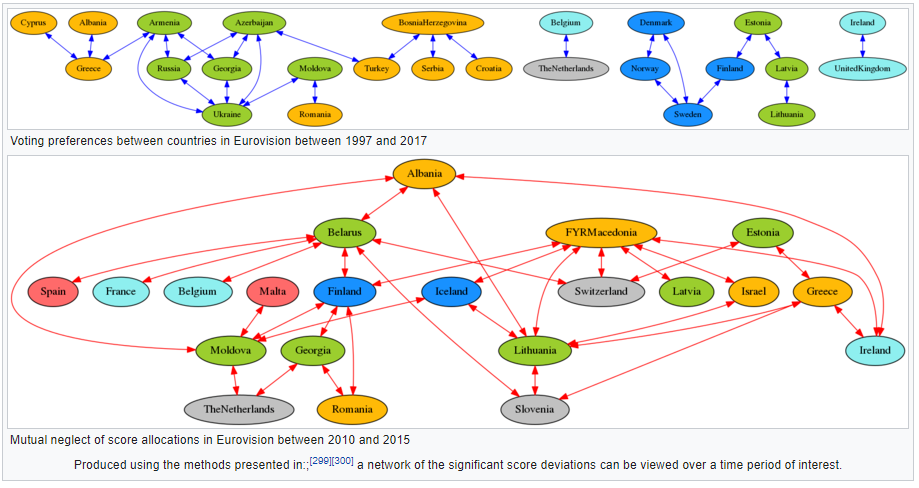

The dataset we need from this analysis are availablle on the [GitHub page](), but are originally taken from [this webpage](). There are 3 datasets that we will need: [Eurovision1.csv](https://github.com/UofGAnalyticsData/DPIP/blob/main/colab_datasets/Eurovision1.csv), [Eurovision2.csv](https://github.com/UofGAnalyticsData/DPIP/blob/main/colab_datasets/Eurovision2.csv), and [Eurovision3.csv](https://github.com/UofGAnalyticsData/DPIP/blob/main/colab_datasets/Eurovision3.csv). Let's start by loading them in

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/UofGAnalyticsData/DPIP/main/colab_datasets/Eurovision1.csv'
euro1 = pd.read_csv(url, header=None,index_col=0)
euro1.index.name = 'Participants'
euro1.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
Participants,,,,,,,,,,,,,,,,,,,,,
Italy,14.0,13.0,14.0,10.0,10.0,22.0,22.0,18.0,12.0,5.0,...,13.0,20.0,22.0,20.0,22.0,10.0,13.0,18.0,24.0,3.0
France,16.0,11.0,14.0,6.0,12.0,17.0,13.0,15.0,12.0,3.0,...,12.0,6.0,22.0,22.0,8.0,24.0,12.0,18.0,15.0,17.0
Switzerland,24.0,15.0,15.0,4.0,16.0,3.0,13.0,2.0,8.0,18.0,...,12.0,6.0,7.0,2.0,12.0,17.0,10.0,NaN,15.0,9.0
Iceland,NaN,20.0,22.0,NaN,8.0,NaN,14.0,NaN,15.0,22.0,...,NaN,1.0,NaN,12.0,13.0,12.0,17.0,10.0,10.0,20.0
Ukraine,4.0,15.0,7.0,14.0,20.0,6.0,8.0,6.0,10.0,1.0,...,12.0,7.0,5.0,8.0,7.0,6.0,12.0,2.0,NaN,4.0


In [ ]:
url = 'https://raw.githubusercontent.com/UofGAnalyticsData/DPIP/main/colab_datasets/Eurovision2.csv'
euro2 = pd.read_csv(url, header=None, names=['Participants', 'Total Score'])
euro2.head()

,Participants,Total Score
0,Italy,524
1,France,499
2,Switzerland,432
3,Iceland,378
4,Ukraine,364


In [ ]:
url = 'https://raw.githubusercontent.com/UofGAnalyticsData/DPIP/main/colab_datasets/Eurovision3.csv'
euro3 = pd.read_csv(url, header=None)
euro3.head()

,0,1
0,1,Albania
1,2,Australia
2,3,Austria
3,4,Azerbaijan
4,5,Belgium


Next we need to do to use our dataset is to add the titles from `euro3` to `euro1` and change the `NaN`s to `0.0`. Lets start with the titles

In [ ]:
judges = np.array(euro3[1])
euro1.columns = judges
euro1.tail()

,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Participants,,,,,,,,,,,,,,,,,,,,,
San Marino,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Netherlands,NaN,3.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Germany,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now lets find a way of replacing all the `NaN`s with `0.0`. I didn't know how to do this without looping through the columns and rows checks for `Nan`s and replacing them but on googling it seems like Pandas has a nice way to do this. Make sure to us Google to help solve your problems when doing things like this!

In [ ]:
euro1 = euro1.fillna(0.0)
euro1.tail()

,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Participants,,,,,,,,,,,,,,,,,,,,,
San Marino,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Netherlands,0.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spain,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Germany,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Eurovision Data Management

Now we have the data in a suitable format we can do some data manipulations. Lets start by seeing who got a score of more than 5 from Belgium.

This is how we would have done it last week

In [ ]:
euro1_belgium5 = euro1.loc[euro1.Belgium>5.0, 'Belgium']
euro1_belgium5

Participants
Italy          10.0
France         12.0
Switzerland    16.0
Iceland         8.0
Ukraine        20.0
Finland        14.0
Malta           7.0
Lithuania       7.0
Russia          7.0
Bulgaria        6.0
Sweden          7.0
Name: Belgium, dtype: float64

We can also do this with query to stop us having to do keep typing the name of the data frame. I can't find a way of doing this in one line (e.g. without the `.Belgium` on line 2), but if you find one then let me know!

In [ ]:
euro1_belgium5 = euro1.query('Belgium>5')
euro1_belgium5.Belgium

Participants
Italy          10.0
France         12.0
Switzerland    16.0
Iceland         8.0
Ukraine        20.0
Finland        14.0
Malta           7.0
Lithuania       7.0
Russia          7.0
Bulgaria        6.0
Sweden          7.0
Name: Belgium, dtype: float64

You can also use `.eval()` to add sub totals etc. This probably isn't relevant here, but just because, let's find out where the combined UK and Ireland votes went and add them to the Data Frame

In [ ]:
euro1_v2 = euro1.eval('UK_ROI_Total = `United Kingdom` + Ireland')
euro1_v2.UK_ROI_Total

Participants
Italy              9.0
France            36.0
Switzerland       17.0
Iceland           38.0
Ukraine           18.0
Finland           16.0
Malta             20.0
Lithuania         28.0
Russia             0.0
Greece             0.0
Bulgaria          14.0
Portugal           9.0
Moldova            0.0
Sweden             1.0
Serbia             0.0
Cyprus             0.0
Israel             6.0
Norway             9.0
Belgium            4.0
Azerbaijan         2.0
Albania            0.0
San Marino         3.0
Netherlands        0.0
Spain              2.0
Germany            0.0
United Kingdom     0.0
Name: UK_ROI_Total, dtype: float64

You could make it a bit easier by simplifying the names like so

In [ ]:
euro1.columns = euro1.columns.str.replace(" ", "_")
euro1.columns

Index(['Albania', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech_Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova',
       'Netherlands', 'North_Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'San_Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Ukraine', 'United_Kingdom'],
      dtype='object')

In [ ]:
euro1.United_Kingdom

Participants
Italy              3.0
France            17.0
Switzerland        9.0
Iceland           20.0
Ukraine            4.0
Finland           11.0
Malta              6.0
Lithuania         12.0
Russia             0.0
Greece             0.0
Bulgaria          13.0
Portugal           7.0
Moldova            0.0
Sweden             0.0
Serbia             0.0
Cyprus             0.0
Israel             6.0
Norway             2.0
Belgium            1.0
Azerbaijan         0.0
Albania            0.0
San Marino         3.0
Netherlands        0.0
Spain              2.0
Germany            0.0
United Kingdom     0.0
Name: United_Kingdom, dtype: float64

Using underscores are also often very useful especially if you want to use these strings as file names to save to disk.

But for simplicity let's not for now, and we can reassign the columns to the previous names:

In [ ]:
euro1.columns = judges
euro1.head()

,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Participants,,,,,,,,,,,,,,,,,,,,,
Italy,14.0,13.0,14.0,10.0,10.0,22.0,22.0,18.0,12.0,5.0,...,13.0,20.0,22.0,20.0,22.0,10.0,13.0,18.0,24.0,3.0
France,16.0,11.0,14.0,6.0,12.0,17.0,13.0,15.0,12.0,3.0,...,12.0,6.0,22.0,22.0,8.0,24.0,12.0,18.0,15.0,17.0
Switzerland,24.0,15.0,15.0,4.0,16.0,3.0,13.0,2.0,8.0,18.0,...,12.0,6.0,7.0,2.0,12.0,17.0,10.0,0.0,15.0,9.0
Iceland,0.0,20.0,22.0,0.0,8.0,0.0,14.0,0.0,15.0,22.0,...,0.0,1.0,0.0,12.0,13.0,12.0,17.0,10.0,10.0,20.0
Ukraine,4.0,15.0,7.0,14.0,20.0,6.0,8.0,6.0,10.0,1.0,...,12.0,7.0,5.0,8.0,7.0,6.0,12.0,2.0,0.0,4.0


## Reshaping Data in Pandas

Often we want to change the shape of our data to be in a different format that might be a more appropriate summary. We can change the Eurovision to 'long' format. To this we will firstly need to convert the index back into a column and then use `melt`

In [ ]:
euro1 = euro1.reset_index()
euro1.head()

,Participants,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
0,Italy,14.0,13.0,14.0,10.0,10.0,22.0,22.0,18.0,12.0,...,13.0,20.0,22.0,20.0,22.0,10.0,13.0,18.0,24.0,3.0
1,France,16.0,11.0,14.0,6.0,12.0,17.0,13.0,15.0,12.0,...,12.0,6.0,22.0,22.0,8.0,24.0,12.0,18.0,15.0,17.0
2,Switzerland,24.0,15.0,15.0,4.0,16.0,3.0,13.0,2.0,8.0,...,12.0,6.0,7.0,2.0,12.0,17.0,10.0,0.0,15.0,9.0
3,Iceland,0.0,20.0,22.0,0.0,8.0,0.0,14.0,0.0,15.0,...,0.0,1.0,0.0,12.0,13.0,12.0,17.0,10.0,10.0,20.0
4,Ukraine,4.0,15.0,7.0,14.0,20.0,6.0,8.0,6.0,10.0,...,12.0,7.0,5.0,8.0,7.0,6.0,12.0,2.0,0.0,4.0


In [ ]:
euro1_melted = euro1.melt(id_vars='Participants', var_name='Judge', value_name='Score')
euro1_melted.head()

,Participants,Judge,Score
0,Italy,Albania,14.0
1,France,Albania,16.0
2,Switzerland,Albania,24.0
3,Iceland,Albania,0.0
4,Ukraine,Albania,4.0


The value name is arbitrary and can be changed for something else if desired:

In [ ]:
euro1_melted = euro1.melt(id_vars='Participants', var_name='Judge', value_name='Points')
euro1_melted.head()

,Participants,Judge,Points
0,Italy,Albania,14.0
1,France,Albania,16.0
2,Switzerland,Albania,24.0
3,Iceland,Albania,0.0
4,Ukraine,Albania,4.0


But lets stick with score for now as it is easier:

In [ ]:
euro1_melted = euro1.melt(id_vars='Participants', var_name='Judge', value_name='Score')


We can then change it back to the wide format by using `pivot`. Note how this alphabetises and restores the participants as indexes

In [ ]:
euro1_unmelted = euro1_melted.pivot(index='Participants', columns='Judge', values='Score')
euro1_unmelted.head()

Judge,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
Participants,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
Azerbaijan,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,...,4.0,12.0,0.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0
Belgium,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,3.0,0.0,0.0,6.0,0.0,1.0,0.0,7.0,1.0
Bulgaria,5.0,2.0,5.0,1.0,6.0,0.0,0.0,12.0,4.0,6.0,...,2.0,6.0,5.0,6.0,0.0,12.0,0.0,10.0,0.0,13.0
Cyprus,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0


## Merging Datasets

Sometimes we want to merge datasets together. In the case of the Eurovision data we have the total scores stored in `euro2`

In [ ]:
euro_join = euro2.merge(euro1_unmelted, on='Participants') # which column do we want to merge on
euro_join.head()

,Participants,Total Score,Albania,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,...,Romania,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
0,Italy,524,14.0,13.0,14.0,10.0,10.0,22.0,22.0,18.0,...,13.0,20.0,22.0,20.0,22.0,10.0,13.0,18.0,24.0,3.0
1,France,499,16.0,11.0,14.0,6.0,12.0,17.0,13.0,15.0,...,12.0,6.0,22.0,22.0,8.0,24.0,12.0,18.0,15.0,17.0
2,Switzerland,432,24.0,15.0,15.0,4.0,16.0,3.0,13.0,2.0,...,12.0,6.0,7.0,2.0,12.0,17.0,10.0,0.0,15.0,9.0
3,Iceland,378,0.0,20.0,22.0,0.0,8.0,0.0,14.0,0.0,...,0.0,1.0,0.0,12.0,13.0,12.0,17.0,10.0,10.0,20.0
4,Ukraine,364,4.0,15.0,7.0,14.0,20.0,6.0,8.0,6.0,...,12.0,7.0,5.0,8.0,7.0,6.0,12.0,2.0,0.0,4.0


## Summarising Datasets

Its also useful to get summaries from your data, although again maybe not so much in this case. Lets get the mean of their scores from `euro1`

In [ ]:
euro1_melted.head()

,Participants,Judge,Score
0,Italy,Albania,14.0
1,France,Albania,16.0
2,Switzerland,Albania,24.0
3,Iceland,Albania,0.0
4,Ukraine,Albania,4.0


In [ ]:
euro1_melted = euro1_melted.set_index('Participants')
euro1_melted_summary = euro1_melted.groupby(level='Participants').agg("mean")
euro1_melted_summary.head()

,Score
Participants,
Albania,1.461538
Azerbaijan,1.666667
Belgium,1.897436
Bulgaria,4.358974
Cyprus,2.410256


If we then wanted to compute the countries with the 10 largest mean scores:

In [ ]:
euro1_melted_summary['Score'].nlargest(10)

Participants
Italy          13.435897
France         12.794872
Switzerland    11.076923
Iceland         9.692308
Ukraine         9.333333
Finland         7.717949
Malta           6.538462
Lithuania       5.641026
Russia          5.230769
Bulgaria        4.358974
Name: Score, dtype: float64

And then from the long version lets keep all the countries how have a mean of more than 10

In [ ]:
euro1_melted_summary = euro1_melted.groupby(level='Participants').filter(lambda x: x.mean()>10)
euro1_melted_summary

,Judge,Score
Participants,,
Italy,Albania,14.0
France,Albania,16.0
Switzerland,Albania,24.0
Italy,Australia,13.0
France,Australia,11.0
...,...,...
France,Ukraine,15.0
Switzerland,Ukraine,15.0
Italy,United Kingdom,3.0
